# Deep Learning in Pytorch


This is not a complete pytorch reference. It is a quick introduction of core topics in Pytorch aimed to help the readers understand the code presented in later chapters. For more information regarding pytorch visit, https://pytorch.org/tutorials/index.html

Training a simple neural network

nn.Module

Network as a graph

Tensors

Autograd

Gradient Descent in pytorch

Adapting nn.Module

Saving and Loading models

Model precisions



## Module torch


torch is the parent module. Various sub-modules under torch are responsible for storing and manipulating data, and methods for serialization of data and functions to operate on data.

1. torch.Tensor class helps to create, initialize, store and operate on multidimensional data.
2. torch.cuda package helps to work with cuda accelerator
3. torch.nn package has all the necessary tools to create a computation graph. Neural networks are internally processed as computation graphs in torch.
4. torch.nn.functional provides stateless functional approach to several algorithms.
5. torch.autograd is the package implenting automatic differentiation. A key algebraic technique needed for enabling learning in neural networks



## torch.Tensor

Tensors are abstractions to store multi dimensional matrices and perform operations on them on a diverse set of devices. You can look more about Tensors in https://pytorch.org/docs/stable/tensors.html

Let us see some tensors in action.

In [31]:
import torch

torch.manual_seed(10)

# Equation of straight line
x = torch.rand(size=(5,2), dtype=torch.float32)

w = torch.ones(size=(1,2), requires_grad=True)
b = torch.zeros(size=(1,), requires_grad=True)
y = x @ w.T + b

In the above examples we have used torch package to create a couple of tensors. The tensors x,w and b were created using torch module and finally we represent a straight line equation. Look at the size parameter, wi can be cretedth that we define the rank of our tensors. Matrices of various ranks can be created.

Compared to numpy multidimensional arrays, tensor can be executed in a variety of devices including cpu, gpu and other accelerators.

In [32]:
is_cuda = torch.cuda.is_available()
print(f"Is cuda device avaiable? {is_cuda}")

def print_cuda_details():
    print(f"# cuda devices : {torch.cuda.device_count()}") 
    current_device = torch.cuda.current_device()
    print(f"device name {torch.cuda.get_device_name(current_device)}")
    print(torch.cuda.get_device_properties(current_device))

print_cuda_details() if is_cuda else print(f"No cuda device")



Is cuda device avaiable? True
# cuda devices : 1
device name NVIDIA GeForce GTX 1650
_CudaDeviceProperties(name='NVIDIA GeForce GTX 1650', major=7, minor=5, total_memory=3896MB, multi_processor_count=16)


Let us show how we can move tensors to cuda and perform tensor operations in cuda instead of cpu.

In [33]:
x = torch.rand(size=(5,2), dtype=torch.float32)

w = torch.ones(size=(1,2), requires_grad=True)
b = torch.zeros(size=(1,), requires_grad=True)

x = x.to("cuda:0")
w = w.to("cuda")
b = b.to("cuda")

y = x @ w.T + b

With "to" operator, we moved tensor to cuda. In our case we have a single cuda gpu. If your machine is equipped with multiple cuda, you can access it through indexing as shown in above example for tensor x

In [34]:
y

tensor([[0.9919],
        [1.2613],
        [1.6808],
        [0.7747],
        [1.1117]], device='cuda:0', grad_fn=<AddBackward0>)

The tensor y is by default stored in cuda device. You can get it back to cpu using the same to operator.

In [35]:
y = y.to("cpu")
y

tensor([[0.9919],
        [1.2613],
        [1.6808],
        [0.7747],
        [1.1117]], grad_fn=<ToCopyBackward0>)

More about torch.cuda is avaiable in https://pytorch.org/docs/stable/cuda.html

scalar values from tensor can be accessed using item function.

In [36]:
b.item()

0.0

matrices can be extracted as list using tolist function.

In [27]:
y.tolist()

[[0.5096296668052673],
 [0.11876606941223145],
 [0.0450817346572876],
 [0.1702507734298706],
 [0.7501509785652161]]

### Operating the tensors

Our typical operation on tensors include

1. slicing
2. boolean indexing
3. reshaping

Let us start with example of slicing. We can use the standard [start: end :step] format.

In [53]:
a = torch.rand(size=(3,16,16,3))

torch module provides various functions to create random variables.

1. torch.rand to create multidimensional matrix determined by size variable from a uniform distribution
2. torch.randn to create random values from a normal distribution with unit variance and zero mean
3. torch.normal to select values from a normal distribution with user provided mean and variance
4. torch.multinomial to give random values based on  weights from a multinomial distribution.

Having created a random tensor, let us perform slicing operation.

In [54]:
print(a[0,0:2,1:5,:].shape)

torch.Size([2, 4, 3])


In [51]:
a = torch.randn(size=(1,3,3))
print(a.shape)
b = a.squeeze()
print(b.shape)
c = b.unsqueeze(dim=0)
print(c.shape)

torch.Size([1, 3, 3])
torch.Size([3, 3])
torch.Size([1, 3, 3])


Let us look at boolean indexing

In [62]:
a[a > .9]

tensor([0.9666, 0.9939, 0.9287, 0.9112, 0.9003, 0.9968, 0.9772, 0.9262, 0.9104,
        0.9575, 0.9709, 0.9256, 0.9535, 0.9496, 0.9133, 0.9071, 0.9259, 0.9948,
        0.9274, 0.9342, 0.9290, 0.9277, 0.9894, 0.9399, 0.9021, 0.9980, 0.9693,
        0.9102, 0.9963, 0.9548, 0.9724, 0.9627, 0.9901, 0.9139, 0.9454, 0.9298,
        0.9930, 0.9462, 0.9945, 0.9488, 0.9639, 0.9131, 0.9389, 0.9993, 0.9526,
        0.9729, 0.9321, 0.9715, 0.9785, 0.9895, 0.9925, 0.9437, 0.9578, 0.9959,
        0.9946, 0.9553, 0.9327, 0.9150, 0.9898, 0.9355, 0.9760, 0.9033, 0.9599,
        0.9242, 0.9487, 0.9960, 0.9286, 0.9085, 0.9200, 0.9321, 0.9488, 0.9604,
        0.9448, 0.9522, 0.9985, 0.9187, 0.9824, 0.9272, 0.9393, 0.9488, 0.9037,
        0.9924, 0.9069, 0.9903, 0.9523, 0.9872, 0.9898, 0.9659, 0.9230, 0.9349,
        0.9486, 0.9914, 0.9916, 0.9529, 0.9122, 0.9085, 0.9415, 0.9552, 0.9550,
        0.9378, 0.9104, 0.9851, 0.9449, 0.9216, 0.9815, 0.9840, 0.9911, 0.9710,
        0.9451, 0.9717, 0.9380, 0.9639, 

In [ ]:
Finally transformation

In [64]:
print(a.shape)
b = a.view(3,16,48)

print(b.shape)

torch.Size([3, 16, 16, 3])
torch.Size([3, 16, 48])


## Torch matrix multiplication

In [8]:
import torch

"""
torch.mm - performs a matrix multiplication without broadcasting
It expects two 2D tensors so n × m * m × p = n×p
i.e. only for matrices and not higher dimensional tensors.

https://pytorch.org/docs/stable/generated/torch.mm.html:
"""

a = torch.randn(2,5)
b = torch.randn(3,5)

torch.mm(a,b.T)

tensor([[ 2.6104,  0.5499,  0.3142],
        [-8.3252, -0.6339, -1.1291]])

In [9]:
"""
torch.mul - performs a elementwise multiplication with broadcasting - (Tensor) by (Tensor or Number)
torch.mul does not perform a matrix multiplication. It broadcasts two tensors and performs 
an elementwise multiplication. 

https://pytorch.org/docs/stable/generated/torch.mul.html
"""

torch.mul(a, b)

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 0

In [10]:
a = torch.randn(2,5)
b = torch.randn(2,5)

torch.mul(a, b)

tensor([[ 0.0039,  0.9935,  0.0681,  0.0039,  0.8029],
        [-1.0538, -0.4971, -2.3967,  1.0259,  0.3220]])

In [ ]:

    torch.matmul

It is better to check out the official documentation https://pytorch.org/docs/stable/generated/torch.matmul.html as it uses different modes depending on the input tensors. It may perform dot product, matrix-matrix product or batched matrix products with broadcasting.

As for your question regarding product of:

tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4)

it is a batched version of a product. please check this simple example for understanding:

import torch

# 3x1x3
a = torch.FloatTensor([[[1, 2, 3]], [[3, 4, 5]], [[6, 7, 8]]])
# 3
b = torch.FloatTensor([1, 10, 100])
r1 = torch.matmul(a, b)

r2 = torch.stack((
    torch.matmul(a[0], b),
    torch.matmul(a[1], b),
    torch.matmul(a[2], b),
))
assert torch.allclose(r1, r2)

So it can be seen as a multiple operations stacked together across batch dimension.

Also it may be useful to read about broadcasting:

https://pytorch.org/docs/stable/notes/broadcasting.html#broadcasting-semantics

In [ ]:
 want to add the introduction of torch.bmm, which is batch matrix-matrix product.

torch.bmm(input,mat2,*,out=None)→Tensor

shape: (b×n×m),(b×m×p) -->(b×n×p)

Performs a batch matrix-matrix product of matrices stored in input and mat2. input and mat2 must be 3-D tensors each containing the same number of matrices.

This function does not broadcast.

Example

input = torch.randn(10, 3, 4)
mat2 = torch.randn(10, 4, 5)
res = torch.bmm(input, mat2)
res.size()  # torch.Size([10, 3, 5])


view vs reshape - reshape copies the tensor.

## Module nn

Module nn has all necessary components to work with neural networks. 

Though we can continue to work in tensors, Pytorch provides further abstractions useful for us to write neural networks. The first one is the container abstraction provided through nn.Module class. We build our neural networks by subclassing fromt his class. We will see the details of the class in the example. There are other abstractions to help us concentrate on building the networks without bothering about writing more code. An example is nn.Linear, which encapsulates two tensors, a weight and bias tensor. By default it makes the following activities,

1. create two tensors, a weight and bias tensor
2. enable both the tensors to be differentiable and hence store the gradients, more about this as we autograd.
3. initialize these tensors appropriately

In [70]:
import torch.nn as nn


w_b = nn.Linear(2,1,bias=True)
y = w_b(x)
y

tensor([[0.3782],
        [0.2405],
        [0.4688],
        [0.4590],
        [0.2189]], grad_fn=<AddmmBackward0>)

In [69]:
for param in w_b.parameters():
    print(param)

Parameter containing:
tensor([[ 0.3023, -0.0789]], requires_grad=True)
Parameter containing:
tensor([-0.4926], requires_grad=True)


In [146]:
from dataclasses import dataclass, field
from typing import List
import torch
import torch.nn as nn

@dataclass
class NetworkConfiguration:
    # input dimension dimension
    input_dim: int = 2
    # Number of hidden layers
    num_hidden_layers: int  = 2
    # Nodes per layer
    nodes_per_layer: List = field(default_factory = lambda :[4,2])
    # Number of output classes
    no_classes: int = 2
    # class labels
    class_labels: List = field(default_factory = lambda: ["zero","one"])
    # add bias
    bias: bool = True
    # add dropout
    dropout: float = 0.0
        
        
class LayerBlock(nn.Module):
    
    def __init__(self, in_nodes, out_nodes, bias=True):
        super().__init__()
        self.linear = nn.Linear(in_nodes, out_nodes, bias=bias)
        self.activation = nn.ReLU()
    
    def forward(self,x):
        return self.activation(self.linear(x))
        
class SimpleNetwork(nn.Module):
    """ """
    def __init__(self, config):
        super().__init__()
        
        self.hidden_blocks = nn.ModuleList()
        
        prev_dim = config.input_dim
        for layer, no_nodes in enumerate(config.nodes_per_layer):
            layer_module = LayerBlock(prev_dim, no_nodes,bias=config.bias)
            prev_dim = no_nodes
            self.hidden_blocks.append(layer_module)
            
        self.output_block  = nn.Linear(config.nodes_per_layer[-1]
                                      ,config.no_classes,bias=config.bias)
        
        self.dropout = nn.Dropout(config.dropout)
    
    def forward(self, x):
        
        for hidden_layer in self.hidden_blocks:
            x = hidden_layer(x)
        
        x = self.dropout(x)
        logits = self.output_block(x)
        
        return logits
        
        

In [147]:
config = NetworkConfiguration()
nnet = SimpleNetwork(config)
nnet

SimpleNetwork(
  (hidden_blocks): ModuleList(
    (0): LayerBlock(
      (linear): Linear(in_features=2, out_features=4, bias=True)
      (activation): ReLU()
    )
    (1): LayerBlock(
      (linear): Linear(in_features=4, out_features=2, bias=True)
      (activation): ReLU()
    )
  )
  (output_block): Linear(in_features=2, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)

In [148]:
nnet.hidden_blocks

ModuleList(
  (0): LayerBlock(
    (linear): Linear(in_features=2, out_features=4, bias=True)
    (activation): ReLU()
  )
  (1): LayerBlock(
    (linear): Linear(in_features=4, out_features=2, bias=True)
    (activation): ReLU()
  )
)

In [149]:
nnet.hidden_blocks[0]

LayerBlock(
  (linear): Linear(in_features=2, out_features=4, bias=True)
  (activation): ReLU()
)

In [150]:
for parameter in nnet.hidden_blocks[0].linear.parameters():
    print(parameter)

Parameter containing:
tensor([[ 0.6417, -0.6400],
        [ 0.3953, -0.5940],
        [-0.0742,  0.1448],
        [-0.1763,  0.4132]], requires_grad=True)
Parameter containing:
tensor([-0.4343,  0.5412, -0.5278,  0.1901], requires_grad=True)


## create some dataset for training

torch.utils.data

In [203]:
from torch.utils.data import Dataset

X = torch.rand((1000,3))
y = torch.rand((1000,2))
y = y / y.sum(dim=-1).unsqueeze(-1)

y = torch.where(y > 0.5, 1.0, 0.0)
data =(X, y)

class SampleDataset(Dataset):
    """"""
    def __init__(self, data):
        self.features, self.labels = data
    def __len__(self):
        return len(self.features)
    def __getitem__(self, idx):
        return (self.features[idx], self.labels[idx])
    


In [204]:
train_dataset = SampleDataset(data)

print(f"No of rows {len(train_dataset)}")

for record in train_dataset:
    X, y = record
    print(X)
    print(y)
    break

No of rows 1000
tensor([0.5114, 0.9511, 0.9501])
tensor([0., 1.])


In [205]:
from torch.utils.data import DataLoader
train_loader = DataLoader(
            dataset = train_dataset
          , batch_size=4
          , shuffle=True
)

In [206]:
for batch in train_loader:
    features, labels = batch
    break

labels

tensor([[0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.]])

## autograd

In [250]:
config = NetworkConfiguration()
config.input_dim = 3
config.nodes_per_layer =[2]

nnet = SimpleNetwork(config)
nnet

SimpleNetwork(
  (hidden_blocks): ModuleList(
    (0): LayerBlock(
      (linear): Linear(in_features=3, out_features=2, bias=True)
      (activation): ReLU()
    )
  )
  (output_block): Linear(in_features=2, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)

In [251]:

def print_parameters(nnet):

    parameters_dict = {
    
    "hidden_layer_1":nnet.hidden_blocks[0].linear.parameters()
   ,"output_layer": nnet.output_block.parameters()
 
    }

    for layer_name, layer_parameters in parameters_dict.items():
        print(layer_name + "\n" + "*" * 15)
        idx = 0
        for parameter in layer_parameters:
            if idx == 0:
                print(f" weight {parameter} \n grad {parameter.grad}")
            else:
                print(f" bias {parameter} \n grad {parameter.grad}")
            idx+=1
                
            

            
print_parameters(nnet)

hidden_layer_1
***************
 weight Parameter containing:
tensor([[-0.4819,  0.5635,  0.5381],
        [ 0.5233,  0.1282,  0.2866]], requires_grad=True) 
 grad None
 bias Parameter containing:
tensor([-0.1749,  0.2694], requires_grad=True) 
 grad None
output_layer
***************
 weight Parameter containing:
tensor([[ 0.4393,  0.1543],
        [-0.6021,  0.6939]], requires_grad=True) 
 grad None
 bias Parameter containing:
tensor([ 0.5130, -0.6584], requires_grad=True) 
 grad None


In [252]:
nnet.train()
logits = nnet(features)

In [253]:
logits

tensor([[ 0.6165, -0.1930],
        [ 0.6222, -0.3448],
        [ 0.6310, -0.1277],
        [ 0.6005, -0.2650]], grad_fn=<AddmmBackward0>)

In [254]:
import torch.nn.functional as F

criterion = torch.nn.BCEWithLogitsLoss()
loss = criterion(logits, labels)
loss

tensor(0.7299, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [260]:
loss.item()

0.7299188375473022

* Chain rule*
d_loss/dw_output * dw_output/dw_hidden = d_loss / dw_hidden

In [255]:
loss.backward()

In [256]:
print_parameters(nnet)

hidden_layer_1
***************
 weight Parameter containing:
tensor([[-0.4819,  0.5635,  0.5381],
        [ 0.5233,  0.1282,  0.2866]], requires_grad=True) 
 grad tensor([[ 0.0203,  0.0398,  0.0126],
        [ 0.0046, -0.0039,  0.0025]])
 bias Parameter containing:
tensor([-0.1749,  0.2694], requires_grad=True) 
 grad tensor([ 0.0798, -0.0085])
output_layer
***************
 weight Parameter containing:
tensor([[ 0.4393,  0.1543],
        [-0.6021,  0.6939]], requires_grad=True) 
 grad tensor([[ 0.0056,  0.0378],
        [-0.0050, -0.0079]])
 bias Parameter containing:
tensor([ 0.5130, -0.6584], requires_grad=True) 
 grad tensor([ 0.0748, -0.0289])


In [257]:
optimizer = torch.optim.SGD(nnet.parameters(), lr=2.)
optimizer.step()
print_parameters(nnet)

hidden_layer_1
***************
 weight Parameter containing:
tensor([[-0.5225,  0.4839,  0.5129],
        [ 0.5140,  0.1360,  0.2816]], requires_grad=True) 
 grad tensor([[ 0.0203,  0.0398,  0.0126],
        [ 0.0046, -0.0039,  0.0025]])
 bias Parameter containing:
tensor([-0.3345,  0.2864], requires_grad=True) 
 grad tensor([ 0.0798, -0.0085])
output_layer
***************
 weight Parameter containing:
tensor([[ 0.4281,  0.0787],
        [-0.5920,  0.7097]], requires_grad=True) 
 grad tensor([[ 0.0056,  0.0378],
        [-0.0050, -0.0079]])
 bias Parameter containing:
tensor([ 0.3634, -0.6006], requires_grad=True) 
 grad tensor([ 0.0748, -0.0289])


## Gradient calculation and application

*Initial Model*

    output_layer
    ***************
     weight Parameter containing:
    tensor([[ 0.4393,  0.1543],
            [-0.6021,  0.6939]], requires_grad=True) 
     grad None
     bias Parameter containing:
    tensor([ 0.5130, -0.6584], requires_grad=True) 
     grad None


*After gradient calculation - loss.backward()*

    output_layer
    ***************
     weight Parameter containing:
    tensor([[ 0.4393,  0.1543],
            [-0.6021,  0.6939]], requires_grad=True) 
     grad tensor([[ 0.0056,  0.0378],
            [-0.0050, -0.0079]])
     bias Parameter containing:
    tensor([ 0.5130, -0.6584], requires_grad=True) 
     grad tensor([ 0.0748, -0.0289])


*After gradient update - optimizer.step()*

    output_layer
    ***************
     weight Parameter containing:
    tensor([[ 0.4281,  0.0787],
            [-0.5920,  0.7097]], requires_grad=True) 
     grad tensor([[ 0.0056,  0.0378],
            [-0.0050, -0.0079]])
     bias Parameter containing:
    tensor([ 0.3634, -0.6006], requires_grad=True) 
     grad tensor([ 0.0748, -0.0289])


In [275]:
## Simple Training loop
from tqdm import tqdm

epochs = 100
steps_per_epoch = len(train_loader)
total_training_steps = epochs * steps_per_epoch
device = "cuda"
progress_bar = tqdm(range(total_training_steps))

# model
config = NetworkConfiguration()
config.input_dim = 3
config.nodes_per_layer =[2]

model = SimpleNetwork(config)
model = model.to(device)

criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters())


losses = []
global_steps = 0


model.train()
for epoch in range(epochs):
    running_loss = 0.
    for batch in train_loader:
        optimizer.zero_grad()
        features,label = batch
        features = features.to(device)
        label = label.to(device)
        logits = model(features)
        loss = criterion(logits, label)
        loss.backward()
        
        global_steps+=1
        progress_bar.update(1)
        running_loss+=loss.item()
    
    losses.append(running_loss / len(train_loader))
    if epoch % 50 == 0:
        avg_train_loss = sum(losses) / (len(losses) + 1e-9)
        print(f"Epoch {epoch} training loss {loss} Average loss {avg_train_loss}")
        
        
        
        


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [01:27<00:00, 285.15it/s]

  2%|██▊                                                                                                                                                              | 436/25000 [00:00<00:22, 1114.07it/s]

Epoch 0 training loss 0.6954176425933838 Average loss 0.6960111048414034



 39%|██████████████████████████████████████████████████████████████▎                                                                                                 | 9735/25000 [00:08<00:12, 1177.56it/s]


 52%|█████████████████████████████████████████████████████████████████████████████████▉                                                                             | 12893/25000 [00:11<00:10, 1118.61it/s]

Epoch 50 training loss 0.6910924911499023 Average loss 0.6960111047477383



 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 22051/25000 [00:19<00:02, 1164.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:40<00:00, 1114.76it/s]

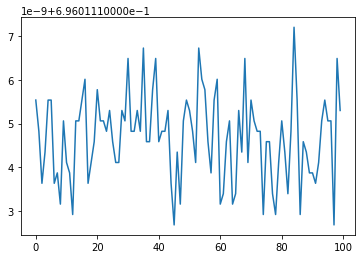

In [276]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses,'-')

In [272]:
len(losses)

25000

## Model parameters and state dict

In [292]:
for name,parameter in model.named_parameters():
    print(name)

hidden_blocks.0.linear.weight
hidden_blocks.0.linear.bias
output_block.weight
output_block.bias


In [293]:
model.state_dict()

OrderedDict([('hidden_blocks.0.linear.weight',
              tensor([[ 0.0695,  0.3702, -0.5255],
                      [-0.5347, -0.4958, -0.2405]], device='cuda:0')),
             ('hidden_blocks.0.linear.bias',
              tensor([-0.1701, -0.0156], device='cuda:0')),
             ('output_block.weight',
              tensor([[ 0.5328,  0.5617],
                      [-0.0759, -0.5888]], device='cuda:0')),
             ('output_block.bias',
              tensor([-0.0859, -0.1702], device='cuda:0'))])

In [294]:
new_net = SimpleNetwork(config)
new_net.state_dict()

OrderedDict([('hidden_blocks.0.linear.weight',
              tensor([[ 0.1919, -0.1822,  0.1177],
                      [ 0.3659,  0.2209, -0.4187]])),
             ('hidden_blocks.0.linear.bias', tensor([0.3179, 0.4011])),
             ('output_block.weight',
              tensor([[ 0.4812,  0.0991],
                      [-0.1189,  0.4465]])),
             ('output_block.bias', tensor([-0.2478,  0.2862]))])

In [295]:
new_net.hidden_blocks[0].linear.weight = torch.nn.Parameter(model.state_dict()['hidden_blocks.0.linear.weight'])    

In [296]:
new_net.state_dict()

OrderedDict([('hidden_blocks.0.linear.weight',
              tensor([[ 0.0695,  0.3702, -0.5255],
                      [-0.5347, -0.4958, -0.2405]], device='cuda:0')),
             ('hidden_blocks.0.linear.bias', tensor([0.3179, 0.4011])),
             ('output_block.weight',
              tensor([[ 0.4812,  0.0991],
                      [-0.1189,  0.4465]])),
             ('output_block.bias', tensor([-0.2478,  0.2862]))])

In [302]:
model.to("cpu")
save_path = "../bin/test_model.pt"
torch.save(model.state_dict(), save_path)

In [303]:
loaded_model = SimpleNetwork(config)
loaded_model.to("cpu")
loaded_model.load_state_dict(torch.load(save_path, weights_only=True))

<All keys matched successfully>

In [ ]:
## Training enhacements

* learning rate scheduler


In [74]:
optimizer.parameters

NameError: name 'optimizer' is not defined